In [2]:
%load_ext autoreload
%autoreload 2

tensor([[ 4.5085e-04,  2.1073e-04,  3.9604e-04],
        [ 2.9877e-04, -3.0312e-05,  1.4836e-04],
        [ 7.5391e-04,  3.8843e-04,  5.1975e-04],
        [ 1.3325e-03,  6.8996e-04,  5.7488e-04],
        [ 2.3534e-03,  1.1251e-03,  5.7504e-04],
        [ 2.9346e-03,  1.3384e-03,  5.2356e-04],
        [ 2.3975e-03,  1.1612e-03,  6.4143e-04],
        [ 1.2036e-03,  6.9124e-04,  6.4031e-04],
        [ 8.8974e-04,  5.1998e-04,  6.0479e-04],
        [ 9.5250e-04,  5.7547e-04,  6.3081e-04]], device='cuda:0')


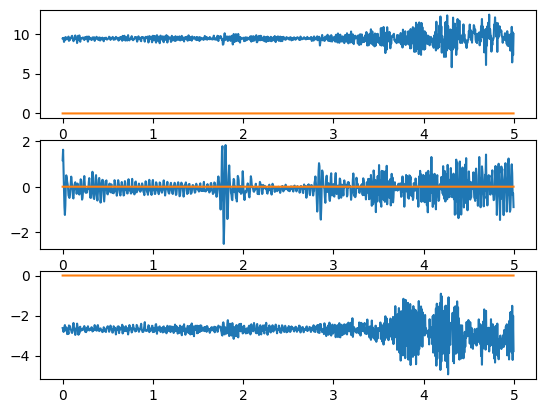

In [33]:
import torch
import os, sys
import matplotlib.pyplot as plt

from dataload import IMUDataset

from Plot_function import vec3d_31_plotter

sys.path.append(os.path.dirname(os.getcwd()))


# print(os.path.dirname(os.getcwd()))

data_type = 'V2_02_medium'
data_type = 'V2_01_easy'

IMUdata = IMUDataset(csv_file="../data/"+data_type+"/mav0/imu0/data.csv", yaml_file="../data/"+data_type+"/mav0/imu0/sensor.yaml")
IMUdata.set_init_time_to_zero()

myplotter = vec3d_31_plotter()
acc_batch = IMUdata[0:1000]

myplotter.pltvec3d(acc_batch[:,0],acc_batch[:,4:7])

from IMU_layers import Acc_model_LN_1, Acc_model_mlp_1, Acc_model_mlp_2, model_choose

model_type = 'Acc_model_LN_1'

model = Acc_model_LN_1().to('cuda')
model.load_state_dict(torch.load("../weights/IMU_Dynamics/acc_only/"+ model_type + "/" +'_best_val_loss_acc.pt')['model'])
with torch.no_grad():
    acc_denoised = model(acc_batch[:,4:7].unsqueeze_(1).to('cuda'))
    acc_denoised = acc_denoised.squeeze(1)
myplotter.addvec3d(acc_batch[:,0],acc_denoised)
plt.show()

print(acc_denoised[0:10])

# plt.subplot(3,1,1)
# plt.plot(acc_batch[:,0],acc_batch[:,4])
# plt.plot(acc_batch[:,0],acc_denoised[:,0].cpu().numpy())
# plt.subplot(3,1,2)
# plt.plot(acc_batch[:,0],acc_batch[:,5])
# plt.plot(acc_batch[:,0],acc_denoised[:,1].cpu().numpy())
# plt.subplot(3,1,3)
# plt.plot(acc_batch[:,0],acc_batch[:,6])
# plt.plot(acc_batch[:,0],acc_denoised[:,2].cpu().numpy())
# plt.show()







In [6]:
import numpy as np

w0 = np.random.rand(3,1)
a0 = np.random.rand(3,1)

a = np.array([0,0,0])
b = np.array([[1],[2],[3]])
print("a.shape",a.shape)
print("b.shape",b.shape)

a+b




a.shape (3,)
b.shape (3, 1)


array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])